In [ ]:
!pip install intake-xarray
!pip install requests
!pip install aiohttp

In [2]:
import intake
catalog = intake.open_catalog("https://s3.imk-ifu.kit.edu:8082/climatedata/catalog.yaml")
print(list(catalog))

['mswx v1.0e', 'eobs v24.0e', 'MERRA2 tavgM 2d aer NX', 'ERA5 daily surface variables']


In [3]:
catalog['mswx v1.0e'].to_dask()

<xarray.Dataset>
Dimensions:    (height_2m: 0, lat: 1800, lon: 3600, time: 15341)
Coordinates:
  * height_2m  (height_2m) float64 
  * lat        (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon        (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
Data variables:
    t2m        (time, lat, lon) float32 dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    t2max      (time, lat, lon) float32 dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    t2min      (time, lat, lon) float32 dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
    tp         (time, lat, lon) float32 dask.array<chunksize=(5, 1800, 3600), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    history:      2021-12-08 12:02: CF-formatting and transformation into ZAR...
    institution:  http://www.gloh2o.org/mswx/
    license:      Creative Commons Attribution-NonCommercial 4.0 Internationa...
    references:   Beck, H. E., van Dijk, A. I. J. M., Larraondo, P. R., McVic...
    source:       Bias-corrected and downscaled ERA5 and ERA5T
    title:        MSWX Multi-Source Weather
    version:      v1.0

In [4]:
catalog['mswx v1.0e'].to_dask().data_vars["t2m"]

<xarray.DataArray 't2m' (time: 15341, lat: 1800, lon: 3600)>
dask.array<open_dataset-d5007f527ed2c445ac56abc00be0b226t2m, shape=(15341, 1800, 3600), dtype=float32, chunksize=(5, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
Attributes:
    long_name:      mean daily temperature at 2m
    standard_name:  air_temperature
    units:          Celsius

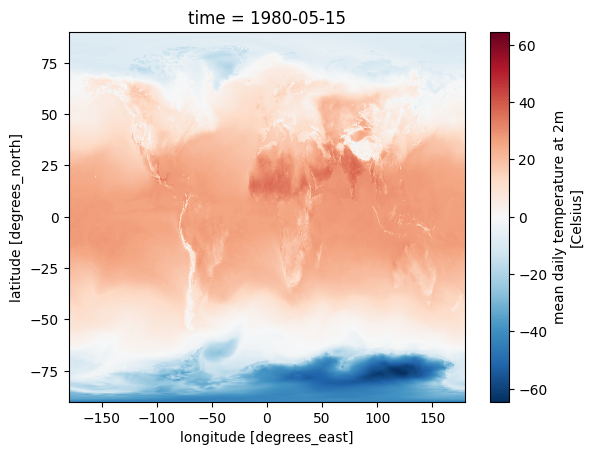

In [6]:
catalog['mswx v1.0e'].to_dask().data_vars["t2m"].isel(time=500).plot()